In [1]:
from pymopt.voxel import VoxelPlateModel

from scipy import stats
import numpy as np
import pandas as pa
import time

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks", {'grid.linestyle': '--'})
import warnings
warnings.filterwarnings('ignore')

In [2]:
def radialDistance(p,w,nn,dr):
    alpha = np.array([(i)*dr for i in range(nn+1)])
    da = np.array([2*np.pi*(i+0.5)*dr**2 for i in range(nn)])
    r = np.sqrt(p[0]**2+p[1]**2)
    Rdr = []
    for i in range(nn):
        index = np.where((alpha[i]<r)&(alpha[i+1]>=r))[0]
        Rdr.append(w[index].sum())
    Rdr = np.array(Rdr)/(da*nPh)
    return alpha[:-1],Rdr

def AngularyResolved(v,w,nn):
    da = np.pi/(2*nn)
    alpha = np.array([(i+0.5)*da for i in range(nn+1)])
    alpha2 = np.array([(i)*da for i in range(nn+1)])
    do = 4*np.pi*np.sin(alpha)*np.sin(da/2)
    at = np.arccos(np.sign(v[2])*(v[2]))
    Rda = []
    for i in range(nn):
        index = np.where((alpha2[i]<at)&(alpha2[i+1]>=at))[0]
        Rda.append(w[index].sum())
    Rda = np.array(Rda)/(do[:-1]*nPh)
    return alpha[:-1],Rda

# Computation Results of single-solidmodel and mcml

## Total diffuse reflectance and total transmittance

### slab of turbid medium

In [3]:
nPh = 50000
params = {
    'thickness':[10],
    'ms':[90],
    'ma':[10],
    'g':[0.],
    'n':[1.5],
    'n_air':1.,
    'x_size':10,'y_size':10,
    'voxel_space':0.1,
}

model = VoxelPlateModel(nPh = nPh)
model.build(**params)
start = time.time()
model = model.start()
print('%s sec'%(time.time()-start))

Memory area size for voxel storage: 1.061 Mbyte

###### Start ######

10  ％
20  ％
30  ％
40  ％
50  ％
60  ％
70  ％
80  ％
90  ％
100  ％
###### End ######
######
Mean Rd 0.218156
Mean Td 0.000000

Calculation time: 0 minutes 2.024 seconds.
2.02580189704895 sec


In [6]:

nPh = 5000
params = {
    'thickness':[0.02],
    'ms':[90],
    'ma':[10],
    'g':[0.75],
    'n':[1.],
    'n_air':1.,
    'x_size':5,'y_size':5,
    'voxel_space':0.01,
}
n_times = 10

Rd=[];Tt=[]
for i in range(n_times):
    model = VoxelPlateModel(nPh = nPh)
    model.build(**params)
    model = model.start()
    RdTt = model.getRdTtValues()
    Rd.append(RdTt['Rd'])
    Tt.append(RdTt['Tt'])


Memory area size for voxel storage: 1.008 Mbyte

###### Start ######

Progress: 35.86 [％]
Calculation time: 0 minutes 0.022 seconds.
Time:  2021-12-28T14:40:22.190668

Progress: 69.9 [％]
Calculation time: 0 minutes 0.039 seconds.
Time:  2021-12-28T14:40:22.207623

Progress: 91.44 [％]
Calculation time: 0 minutes 0.066 seconds.
Time:  2021-12-28T14:40:22.234552

Progress: 99.28 [％]
Calculation time: 0 minutes 0.095 seconds.
Time:  2021-12-28T14:40:22.263474


###### Finish ######
Maximum step number: 30
######
Mean Rd 0.094165
Mean Tt 0.662859

Calculation time: 0 minutes 0.113 seconds.
Memory area size for voxel storage: 1.008 Mbyte

###### Start ######

Progress: 36.46 [％]
Calculation time: 0 minutes 0.014 seconds.
Time:  2021-12-28T14:40:22.400109

Progress: 71.0 [％]
Calculation time: 0 minutes 0.029 seconds.
Time:  2021-12-28T14:40:22.415068

Progress: 91.86 [％]
Calculation time: 0 minutes 0.045 seconds.
Time:  2021-12-28T14:40:22.431026

Progress: 98.98 [％]
Calculation time: 0 minut

In [7]:
print('Mean Rd %0.6f, sd_error %0.6f'%(np.mean(Rd),np.std(Rd)/np.sqrt(len(Rd))))
print('Mean Tt %0.6f, sd_error %0.6f'%(np.mean(Tt),np.std(Tt)/np.sqrt(len(Tt))))

Mean Rd 0.096016, sd_error 0.001238
Mean Tt 0.661525, sd_error 0.001549


### Semi-infinite turbid medium that has mismatched refractive index with the ambient medium

In [4]:
nPh = 5000
params = {
    'thickness':[10],
    'ms':[90],
    'ma':[10],
    'g':[0.],
    'n':[1.5],
    'n_air':1.,
    'x_size':10,'y_size':10,
    'voxel_space':0.1,
}
n_times = 10

Rd=[];Tt=[]
for i in range(n_times):
    model = VoxelPlateModel(nPh = nPh)
    model.build(**params)
    model = model.start()
    RdTt = model.getRdTtValues()
    Rd.append(RdTt['Rd'])
    Tt.append(RdTt['Tt'])


Memory area size for voxel storage: 1.061 Mbyte

###### Start ######

Progress: 5.94 [％]
Calculation time: 0 minutes 0.007 seconds.
Time:  2021-12-28T14:28:55.224317

Progress: 14.04 [％]
Calculation time: 0 minutes 0.016 seconds.
Time:  2021-12-28T14:28:55.233292

Progress: 24.38 [％]
Calculation time: 0 minutes 0.032 seconds.
Time:  2021-12-28T14:28:55.249250

Progress: 37.84 [％]
Calculation time: 0 minutes 0.064 seconds.
Time:  2021-12-28T14:28:55.281165

Progress: 50.48 [％]
Calculation time: 0 minutes 0.132 seconds.
Time:  2021-12-28T14:28:55.348983

Progress: 62.64 [％]
Calculation time: 0 minutes 0.246 seconds.
Time:  2021-12-28T14:28:55.463679

Progress: 99.74 [％]
Calculation time: 0 minutes 0.352 seconds.
Time:  2021-12-28T14:28:55.569395


###### Finish ######
Maximum step number: 153
######
Mean Rd 0.223885
Mean Tt 0.000000

Calculation time: 0 minutes 0.366 seconds.
Memory area size for voxel storage: 1.061 Mbyte

###### Start ######

Progress: 5.14 [％]
Calculation time: 0 minu

Progress: 62.64 [％]
Calculation time: 0 minutes 0.226 seconds.
Time:  2021-12-28T14:28:59.298429

Progress: 99.82 [％]
Calculation time: 0 minutes 0.318 seconds.
Time:  2021-12-28T14:28:59.390183


###### Finish ######
Maximum step number: 153
######
Mean Rd 0.225294
Mean Tt 0.000000

Calculation time: 0 minutes 0.329 seconds.


In [5]:
print('Mean Rd %0.6f, sd_error %0.6f'%(np.mean(Rd),np.std(Rd)/np.sqrt(len(Rd))))
print('Mean Tt %0.6f, sd_error %0.6f'%(np.mean(Tt),np.std(Tt)/np.sqrt(len(Tt))))

Mean Rd 0.221365, sd_error 0.000940
Mean Tt 0.000000, sd_error 0.000000


## Angularly resolved diffuse reflectance and transmittance

In [9]:

nPh = 500000
params = {
    'thickness':[0.02],
    'ms':[90],
    'ma':[10],
    'g':[0.75],
    'n':[1.],
    'n_air':1.,
    'x_size':4,'y_size':4,

    'voxel_space':0.001,
}

model = VoxelPlateModel(nPh = nPh)
model.build(**params)
model = model.start()



Memory area size for voxel storage: 352.352 Mbyte

###### Start ######

Progress: 36.077 [％]
Calculation time: 0 minutes 7.486 seconds.
Time:  2021-12-28T15:17:54.540897

Progress: 70.147 [％]
Calculation time: 0 minutes 12.689 seconds.
Time:  2021-12-28T15:17:59.743992

Progress: 91.901 [％]
Calculation time: 0 minutes 16.410 seconds.
Time:  2021-12-28T15:18:03.465048

Progress: 99.224 [％]
Calculation time: 0 minutes 18.021 seconds.
Time:  2021-12-28T15:18:05.075743

Progress: 99.99 [％]
Calculation time: 0 minutes 18.522 seconds.
Time:  2021-12-28T15:18:05.577402


###### Finish ######
Maximum step number: 47
######
Mean Rd 0.096957
Mean Tt 0.661793

Calculation time: 0 minutes 18.792 seconds.


AttributeError: 'VoxelPlateModel' object has no attribute 'getResult'

In [10]:
rez = model.get_result()
v_result = rez["v"]
w_result = rez["w"]
Tt_index = np.where(v_result[2]>0)[0]
Rd_index = np.where(v_result[2]<0)[0]

Trancemittance


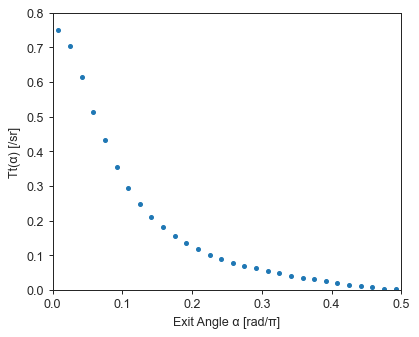

In [11]:
print('Trancemittance')
nn = 30
alpha,Tta = AngularyResolved(v_result[:,Tt_index],w_result[Tt_index],nn)

plt.figure(figsize=(5,4),dpi=90)
plt.plot(alpha/np.pi,Tta,'.')
plt.xlabel('Exit Angle α [rad/π]')
plt.ylabel('Tt(α) [/sr]')
plt.xlim(0,0.5)
plt.ylim(0,0.8)
plt.show()

Refrected


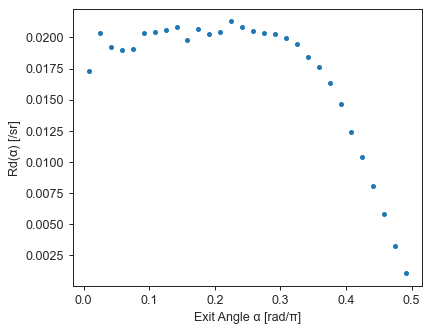

In [12]:
print('Refrected')
nn = 30
alpha,Rda = AngularyResolved(v_result[:,Rd_index],w_result[Rd_index],nn)

plt.figure(figsize=(5,4),dpi=90)
plt.plot(alpha/np.pi,Rda,'.')
plt.xlabel('Exit Angle α [rad/π]')
plt.ylabel('Rd(α) [/sr]')
#plt.xlim(0,0.5)
#plt.ylim(0,0.025)
plt.show()

In [ ]:
df_ = pa.DataFrame(np.array([alpha/np.pi,Rda,Tta]).T,columns = ['Angle','Rd','Tt'])
df_.to_csv('result/voxel_angle.csv',index=None)

## Radially resolved diffuse reflectance

In [ ]:
nPh = 1000000
params = {
    'thickness':[20],
    'ms':[100],
    'ma':[0.1],
    'g':[0.9],
    'n':[1.],
    'n_air':1.,
    'xy_size':[20,20],
    'voxel_space':0.1,
}

model = VoxelPlateModel(nPh = nPh)
model.build(**params)
model = model.start()

rezA = model.get_result()
p_resultA = rezA["p"]
v_resultA = rezA["v"]
w_resultA = rezA["w"]
Tt_indexA = np.where(v_resultA[2]>0)[0]
Rd_indexA = np.where(v_resultA[2]<0)[0]

In [ ]:

params = {
    'thickness':[20],
    'ms':[10],
    'ma':[0.1],
    'g':[0.],
    'n':[1.],
    'n_air':1.,
    'xy_size':[20,20],
    'voxel_space':0.1,
}

model = VoxelPlateModel(nPh = nPh)
model.build(**params)
model = model.start()

rezB = model.get_result()
p_resultB = rezB["p"]
v_resultB = rezB["v"]
w_resultB = rezB["w"]
Tt_indexB = np.where(v_resultB[2]>0)[0]
Rd_indexB = np.where(v_resultB[2]<0)[0]

In [ ]:
nn = 200
dr = 0.005


alphaA,RdrA = radialDistance(p_resultA[:,Rd_indexA],w_resultA[Rd_indexA],nn,dr)
alphaB,RdrB = radialDistance(p_resultB[:,Rd_indexB],w_resultB[Rd_indexB],nn,dr)

In [ ]:

plt.figure(figsize=(5,4),dpi=90)
plt.plot(alphaA,RdrA,'-',c = 'red',label = 'A: g = 0.9')
plt.plot(alphaB,RdrB,'-',c = 'blue',label = "B: g = 0.0")
plt.yscale('log')
plt.xlim(0,1)
plt.legend()
plt.xlabel('r [cm]')
plt.ylabel('Rd $[cm^{-2}]$')
plt.show()

In [ ]:
plt.figure(figsize=(5,4),dpi=90)
plt.plot(alphaA,(RdrB-RdrA)/RdrA,'-',c = 'red',label = '(B-A) / A')
plt.xlim(0,1)
plt.ylim(-0.5,2)
plt.legend()
plt.xlabel('r [cm]')
plt.ylabel('Relative Error')
plt.show()

In [ ]:
df_ = pa.DataFrame(np.array([alphaA,RdrA,RdrB]).T,columns = ['r cm','A_Rd','B_Rd'])
df_.to_csv('voxel_equivalent.csv',index=None)

## Depth resolved internal fluence

In [ ]:
model_params = {
    'nPh': 1000000,
    'fluence': True,
    'nr': 800,
    'nz': 200,
    'dr': 0.01,
    'dz': 0.01,
}

print("######  n = 1.  ######")
params = {
    'thickness':[200],
    'ms':[100],
    'ma':[0.1],
    'g':[0.9],
    'n':[1.],
    'n_air':1.,
    'xy_size':20,
    'voxel_space':0.1,
}
model = VoxelPlateModel(**model_params)
model.build(**params)
model = model.start()
fluenceA = model.getFluence()

print('')
print("######  n = 1.37  ######")
params = {
    'thickness':[200],
    'ms':[100],
    'ma':[0.1],
    'g':[0.9],
    'n':[1.37],
    'n_air':1.,
    'xy_size':20,
    'voxel_space':0.1,
}
model = VoxelPlateModel(**model_params)
model.build(**params)
model = model.start()
fluenceB = model.getFluence()

In [ ]:
da = np.array([2*np.pi*(i+0.5)*model_params['dr']**2 for i in range(model_params['nr'])])
aaa = params['ma'][0]*model_params['nPh']*model_params['dz']
phi_zA = (fluenceA["Arz"].T/aaa).T.sum(0)
phi_zB = (fluenceB["Arz"].T/aaa).T.sum(0)

plt.figure(figsize=(5,4),dpi=100)
plt.plot(fluenceA["z"],phi_zA,c = 'red',label = 'n = 1.0')
plt.plot(fluenceB["z"],phi_zB,c = 'blue',label = 'n = 1.37')
plt.xlabel('Z [cm]')
plt.ylabel('Fluence [-]')
plt.legend()
plt.yscale('log')
plt.xlim(0,1)
plt.ylim(0.5,10)
plt.show()

In [ ]:
df_ = pa.DataFrame(np.array([fluenceA["z"],phi_zA,phi_zB]).T,columns = ['z cm','n_1','n_1.37'])
df_.to_csv('result/voxel_fluence_z.csv',index=None)

# Multi-layered Tissues

## Refrective and transmittnace rate

In [14]:
nPh = 1000000
params = {
    'thickness':[0.1,0.1,0.2],
    'ms':[100,10,10],
    'ma':[1,1,2],
    'g':[0.9,0,0.7],
    'n':[1.37,1.37,1.37],
    'n_air':1.,
    'x_size':4,'y_size':4,
    'voxel_space':0.01,
}
model = VoxelPlateModel(nPh = nPh)
model.build(**params)

start = time.time()
model = model.start()
print('%s sec'%(time.time()-start))

rez = model.get_result()
p_result = rez["p"]
v_result = rez["v"]
w_result = rez["w"]

Tt_index = np.where(v_result[2]>0)[0]
Rd_index = np.where(v_result[2]<0)[0]

Memory area size for voxel storage: 6.787 Mbyte

###### Start ######

Progress: 0.218 [％]
Calculation time: 0 minutes 3.227 seconds.
Time:  2021-12-28T15:23:02.195294

Progress: 0.726 [％]
Calculation time: 0 minutes 7.901 seconds.
Time:  2021-12-28T15:23:06.868805

Progress: 2.541 [％]
Calculation time: 0 minutes 19.407 seconds.
Time:  2021-12-28T15:23:18.375054

Progress: 11.387 [％]
Calculation time: 0 minutes 55.905 seconds.
Time:  2021-12-28T15:23:54.872576

Progress: 34.615 [％]
Calculation time: 2 minutes 3.030 seconds.
Time:  2021-12-28T15:25:01.998180

Progress: 64.67 [％]
Calculation time: 3 minutes 24.544 seconds.
Time:  2021-12-28T15:26:23.511462

Progress: 89.972 [％]
Calculation time: 4 minutes 29.821 seconds.
Time:  2021-12-28T15:27:28.789339

Progress: 99.351 [％]
Calculation time: 4 minutes 54.747 seconds.
Time:  2021-12-28T15:27:53.714510

Progress: 99.998 [％]
Calculation time: 5 minutes 2.973 seconds.
Time:  2021-12-28T15:28:01.940525


###### Finish ######
Maximum step num

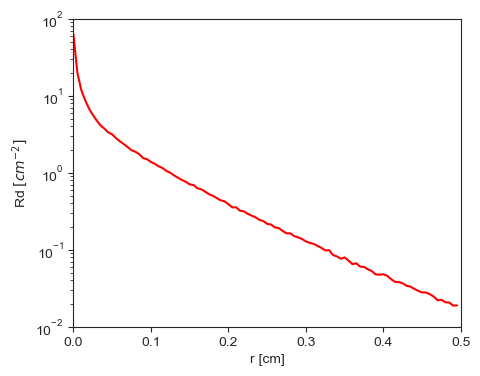

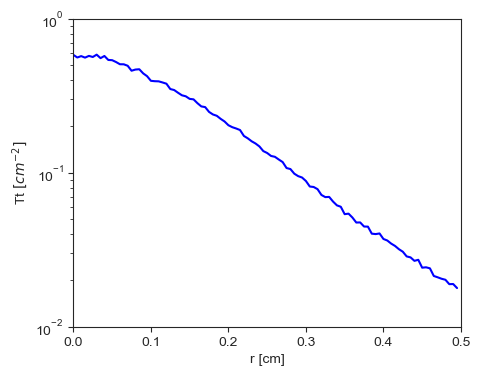

In [15]:
nn = 100
dr = 0.005

alphaRd,Rd = radialDistance(p_result[:,Rd_index],w_result[Rd_index],nn,dr)
alphaTt,Tt = radialDistance(p_result[:,Tt_index],w_result[Tt_index],nn,dr)

plt.figure(figsize=(5,4),dpi=100)
plt.plot(alphaRd,Rd,'-',c = 'red')
plt.yscale('log')
plt.xlim(0,0.5)
plt.ylim(10**-2,10**2)
plt.xlabel('r [cm]')
plt.ylabel('Rd $[cm^{-2}]$')
plt.show()

plt.figure(figsize=(5,4),dpi=100)
plt.plot(alphaTt,Tt,'-',c = 'blue')
plt.yscale('log')
plt.xlim(0,0.5)
plt.ylim(10**-2,1)
plt.xlabel('r [cm]')
plt.ylabel('Tt $[cm^{-2}]$')
plt.show()

In [ ]:
df_ = pa.DataFrame(np.array([alphaRd,Rd,Tt]).T,columns = ['r cm','Rd','Tt'])
df_.to_csv('voxel_multi_rt_test.csv',index=None)

In [6]:
niteral = 3
nn = 100
dr = 0.01
params = {
    'thickness':[5],
    'ms':[10],
    'ma':[0.01],
    'g':[0.9],
    'n':[1.5],
    'n_air':1.,
    'x_size':5,'y_size':5,
    'voxel_space':0.5,
}
list_nPh = [1e3,1e4,1e5,1e6,1e7,1e8]

Rd_list = []
Td_list = []
time_list = []
for j in range(niteral):
    sub_list =[]
    for i in list_nPh:
        print(i, " mm")
        model = VoxelPlateModel(nPh = i)
        model.build(**params)
        st = time.time()
        model = model.start()
        ed = time.time()-st
        sub_list.append(ed)
        rez = model.get_result()
        p_result = rez["p"]
        v_result = rez["v"]
        w_result = rez["w"]
        Rd_index = np.where(v_result[2]<0)[0]
        Td_index = np.where(v_result[2]>0)[0]
        alpha,Rdr = radialDistance(p_result[:,Rd_index],w_result[Rd_index],nn,dr)
        alpha,Tdr = radialDistance(p_result[:,Td_index],w_result[Td_index],nn,dr)
        Rd_list.append(Rdr)    
        Td_list.append(Tdr)
    time_list.append(sub_list)

1000.0  mm
Memory area size for voxel storage: 0.002 Mbyte

###### Start ######

10  ％
20  ％
30  ％
40  ％
50  ％
60  ％
70  ％
80  ％
90  ％
100  ％
###### End ######
######
Mean Rd 0.523966
Mean Td 0.346484

Calculation time: 0 minutes 0.019 seconds.
10000.0  mm
Memory area size for voxel storage: 0.002 Mbyte

###### Start ######

10  ％
20  ％
30  ％
40  ％
50  ％
60  ％
70  ％
80  ％
90  ％
100  ％
###### End ######
######
Mean Rd 0.527888
Mean Td 0.343557

Calculation time: 0 minutes 0.094 seconds.
100000.0  mm
Memory area size for voxel storage: 0.002 Mbyte

###### Start ######

10  ％
20  ％
30  ％
40  ％
50  ％
60  ％
70  ％
80  ％
90  ％
100  ％
###### End ######
######
Mean Rd 0.525105
Mean Td 0.346631

Calculation time: 0 minutes 0.940 seconds.
1000000.0  mm
Memory area size for voxel storage: 0.002 Mbyte

###### Start ######

10  ％
20  ％
30  ％
40  ％
50  ％
60  ％
70  ％
80  ％
90  ％
100  ％
###### End ######
######
Mean Rd 0.527698
Mean Td 0.343934

Calculation time: 0 minutes 9.464 seconds.
10000000.0  mm

In [7]:
speed_mean = (np.array(list_nPh)/np.array(time_list)).mean(0)
tt_mean = np.array(time_list).mean(0)
speed_sd = (np.array(list_nPh)/np.array(time_list)).std(0)
tt_sd = np.array(time_list).std(0)
df = pa.DataFrame({
    "nPh":list_nPh,
    "speed_mean":speed_mean,
    "speed_sd":speed_sd,
    "tt_mean":tt_mean,
    "tt_sd":tt_sd,
})
df.to_csv("speed_cpu.csv",index=None)